In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['Train_Test_IoT_GPS_Tracker.csv']))
#data = pd.read_csv("Train_Test_IoT_GPS_Tracker.csv")

Saving Train_Test_IoT_GPS_Tracker.csv to Train_Test_IoT_GPS_Tracker.csv


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58960 entries, 0 to 58959
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         58960 non-null  int64  
 1   date       58960 non-null  object 
 2   time       58960 non-null  object 
 3   latitude   58960 non-null  float64
 4   longitude  58960 non-null  float64
 5   label      58960 non-null  int64  
 6   type       58960 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ MB


In [ ]:
data.isnull().sum()

ts           0
date         0
time         0
latitude     0
longitude    0
label        0
type         0
dtype: int64

In [ ]:
data.drop(["ts","date","time","label"],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58960 entries, 0 to 58959
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   58960 non-null  float64
 1   longitude  58960 non-null  float64
 2   type       58960 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
data['type'].value_counts()

normal        35000
ddos           5000
injection      5000
password       5000
backdoor       5000
ransomware     2833
xss             577
scanning        550
Name: type, dtype: int64

In [ ]:
data.describe()

,latitude,longitude
count,58960.000000,58960.000000
mean,46.703771,56.840204
std,74.735511,75.032361
min,0.000000,10.000000
25%,1.152564,11.162110
50%,4.514077,14.421946
75%,77.450045,87.454185
max,549.381916,555.133643


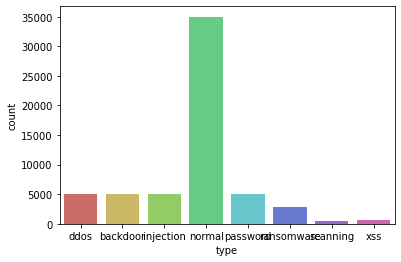

In [ ]:
sns.countplot(x='type',data=data, palette='hls')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58ebbd9cf8>,
      dtype=object)

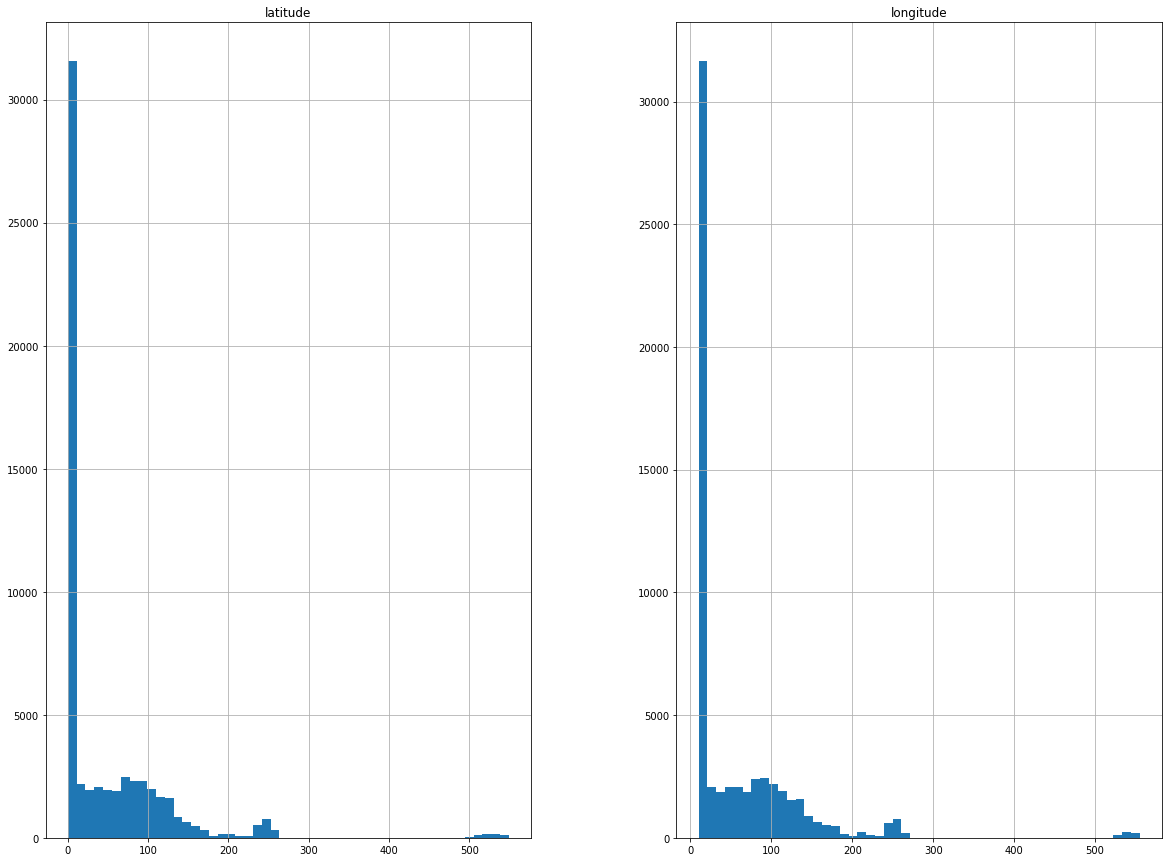

In [ ]:
# #for plotting histogram
data.hist(bins=50, figsize=(20,15))

# Train test splitting

In [ ]:
#for learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(data, 0.3)

In [ ]:
#print("No. of rows in train test = ", len(train_set),"\nNo. of rows in test set = ",len(test_set))

In [ ]:
data['type']=data['type'].apply(lambda x: 1 if x=="backdoor" else ( 2 if x=="password" else(3 if x=="ddos" else(4 if x=="injection" else(5 if x=="ransomware" else(6 if x=="scanning" else (7 if x=="xss" else 0)))))))

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.3, random_state = 42)
print("No. of rows in train test = ", len(train_set),"\nNo. of rows in test set = ",len(test_set))

No. of rows in train test =  41272 
No. of rows in test set =  17688


In [ ]:
train_set

,latitude,longitude,type
961,40.560061,50.074884,1
26954,19.699556,29.321570,5
37231,0.653962,10.965014,0
51274,1.352640,10.856715,0
4393,99.725734,110.067128,1
...,...,...,...
54343,0.166991,10.126091,0
38158,0.000000,10.000000,0
860,62.947917,77.076611,1
15795,62.300158,68.758957,4


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(data,data['type']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
strat_train_set

,latitude,longitude,type
42081,120.262437,131.068586,0
22225,23.908746,34.212076,2
40073,0.259659,10.567472,0
18856,1.071265,11.066575,0
5123,114.617609,126.610182,1
...,...,...,...
48544,1.548440,11.317833,0
17375,3.828132,13.462089,0
39290,0.189104,10.175780,0
10488,2.390823,13.074800,0


In [ ]:
strat_test_set['type'].value_counts()

0    10500
4     1500
3     1500
2     1500
1     1500
5      850
7      173
6      165
Name: type, dtype: int64

In [ ]:
data = strat_train_set.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41272 entries, 42081 to 5498
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   41272 non-null  float64
 1   longitude  41272 non-null  float64
 2   type       41272 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 MB


In [ ]:
data.shape

(41272, 3)

## TRAINING USING SVM

In [ ]:
X_train = strat_train_set.drop("type", axis=1)
Y_train = strat_train_set["type"].copy()
X_test = strat_test_set.drop("type", axis=1)
Y_test = strat_test_set["type"].copy()

In [ ]:
len(X_test)

17688

In [ ]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17688 entries, 3837 to 33609
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   17688 non-null  float64
 1   longitude  17688 non-null  float64
 2   type       17688 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 552.8 KB


In [ ]:
len(strat_test_set)

17688

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf", random_state = 1)
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("Accuracy is ", classifier.score(X_train,Y_train))

Accuracy is  0.7056357821283195


In [ ]:
predictors=list(X_train)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
# test_set["Predictions"] = Y_pred
# strat_test_set["Predictions"] = Y_pred

In [ ]:
len(Y_pred)

17688

In [ ]:
len(strat_test_set)

17688

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88     10500
           1       0.44      0.34      0.39      1500
           2       0.00      0.00      0.00      1500
           3       0.66      0.49      0.57      1500
           4       0.37      0.47      0.41      1500
           5       0.34      0.65      0.44       850
           6       0.90      0.28      0.43       165
           7       0.00      0.00      0.00       173

    accuracy                           0.70     17688
   macro avg       0.44      0.40      0.39     17688
weighted avg       0.65      0.70      0.67     17688



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.7013794663048395


In [ ]:
cm

array([[9838,  462,    0,   24,   87,   89,    0,    0],
       [ 497,  516,    0,  150,  308,   29,    0,    0],
       [ 504,   17,    0,   46,  552,  381,    0,    0],
       [ 110,   87,    0,  740,  204,  354,    5,    0],
       [ 524,   95,    0,   33,  709,  139,    0,    0],
       [ 194,    0,    0,   26,   74,  556,    0,    0],
       [  23,    0,    0,   95,    0,    0,   47,    0],
       [  64,    0,    0,    0,    0,  109,    0,    0]])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10],'kernel':['rbf'],'gamma':[1,0.1]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.802, total=  40.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.802, total=  40.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.808, total=  40.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=  40.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.810, total=  40.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.732, total=  27.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.746, total=  27.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.748, total=  27.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.738, total=  27.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 18.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# 10-fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold 
folds = StratifiedKFold(n_splits=10)

In [ ]:
folds

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
X_test

,latitude,longitude
3837,115.672132,130.659836
18783,0.277547,10.286694
26477,9.658985,18.211547
15884,76.767594,86.859870
47110,2.418468,12.095987
...,...,...
55835,0.276956,10.082896
39273,0.968139,11.057944
3251,105.450640,119.496560
41977,122.278546,128.403759


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
scores_svm = []
for train_index, test_index in folds.split(digits.data,digits.target):
  X_train, X_test, Y_train, Y_test = digits.data[train_index],digits.data[test_index],digits.target[train_index],digits.target[test_index]
  scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, Y_train, Y_test))

In [ ]:
scores_svm

[0.4388888888888889,
 0.5777777777777777,
 0.4666666666666667,
 0.3888888888888889,
 0.4722222222222222,
 0.4,
 0.5055555555555555,
 0.5754189944134078,
 0.5586592178770949,
 0.43575418994413406]

# Testing the model obtained after HYPER PARAMETER TUNING

In [ ]:
X_train1 = strat_train_set.drop("type", axis=1)
Y_train1 = strat_train_set["type"].copy()
X_test1 = strat_test_set.drop("type", axis=1)
Y_test1 = strat_test_set["type"].copy()

modelnew1 = SVC(C = 10, gamma = 1, kernel="rbf", random_state = 0, probability=True)
modelnew1.fit(X_train1,Y_train1)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=0, shrinking=True, tol=0.001, verbose=False)

In [ ]:
Y_pred1 = modelnew1.predict(X_test1)
print(classification_report(Y_test1,Y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10500
           1       0.88      0.84      0.86      1500
           2       0.68      0.70      0.69      1500
           3       0.79      0.79      0.79      1500
           4       0.88      0.91      0.90      1500
           5       0.79      0.58      0.67       850
           6       1.00      0.93      0.96       165
           7       0.50      0.12      0.19       173

    accuracy                           0.90     17688
   macro avg       0.81      0.73      0.75     17688
weighted avg       0.89      0.90      0.89     17688



In [ ]:
modelnew1.score(X_test1,Y_test1)

0.8983491632745364

In [ ]:
cm1 = confusion_matrix(Y_test1,Y_pred1)

In [ ]:
cm1

array([[10353,    15,    80,    15,     1,    32,     0,     4],
       [   38,  1264,    45,    44,   100,     9,     0,     0],
       [  209,    43,  1050,    95,    53,    43,     0,     7],
       [   60,    48,   162,  1188,     5,    29,     0,     8],
       [    0,    52,    43,    17,  1369,    18,     0,     1],
       [  128,     9,   104,    93,    23,   493,     0,     0],
       [   10,     0,     2,     0,     0,     0,   153,     0],
       [   48,     0,    50,    54,     0,     1,     0,    20]])

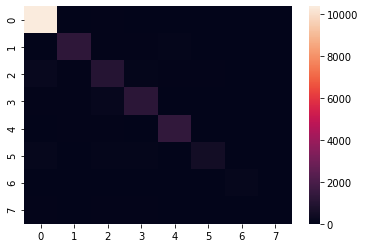

In [ ]:
import seaborn as sns
sns.heatmap(cm1)

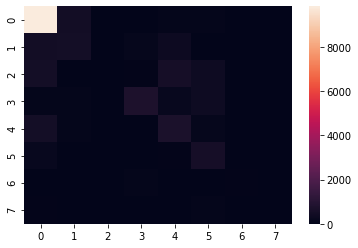

In [ ]:
import seaborn as sns
sns.heatmap(cm)